In [38]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


df=pd.read_csv(r'C:\Users\ali.karimi\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


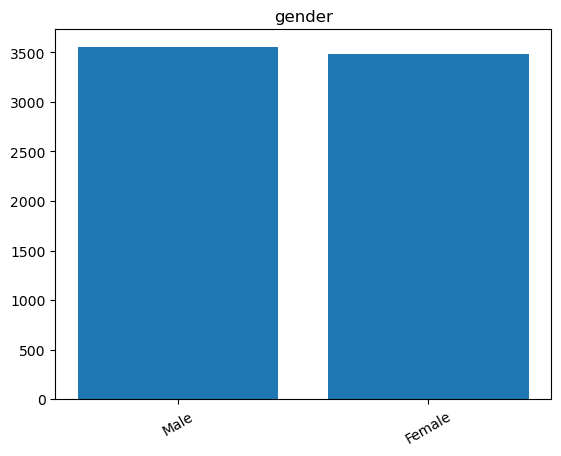

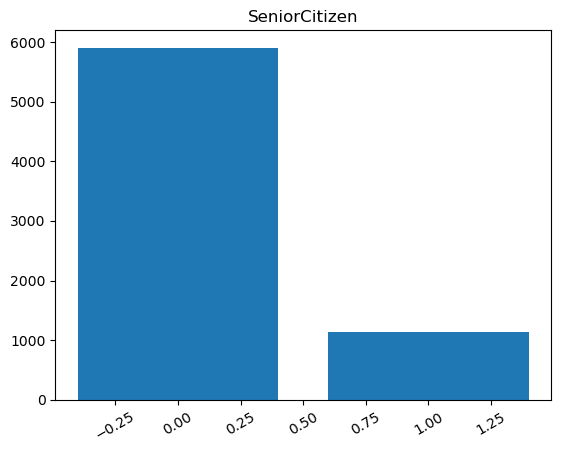

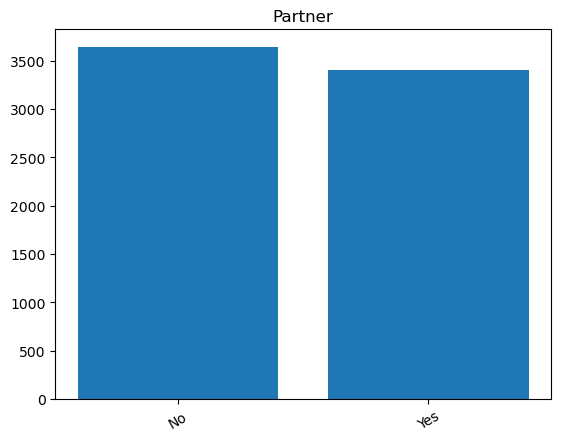

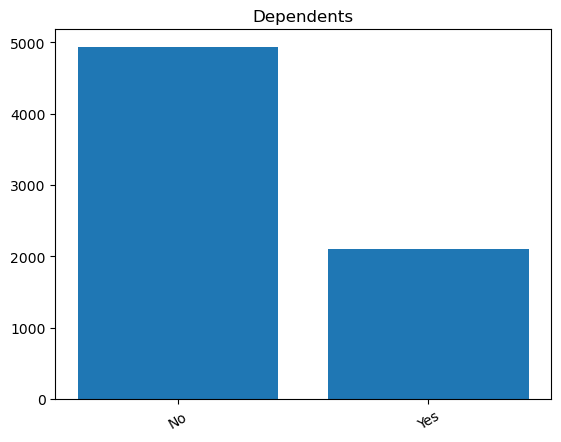

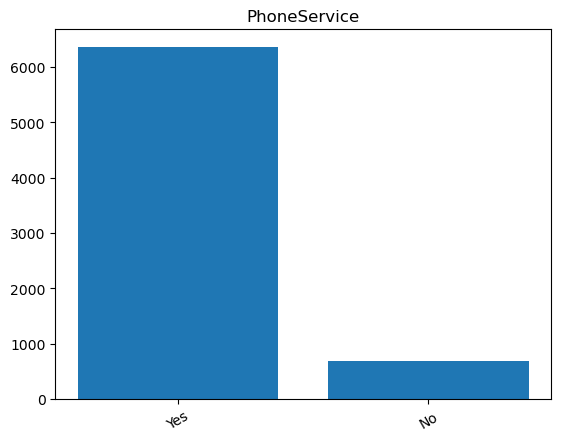

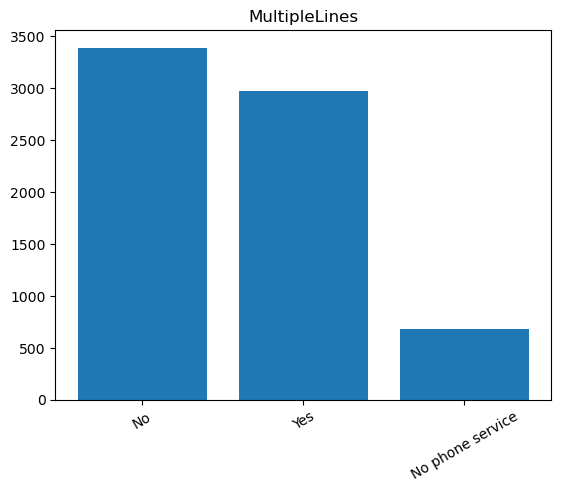

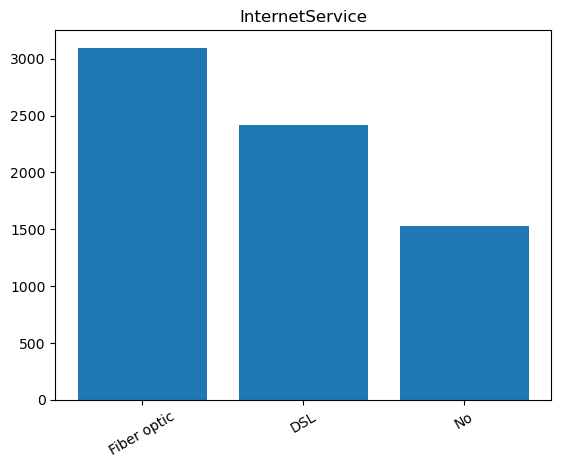

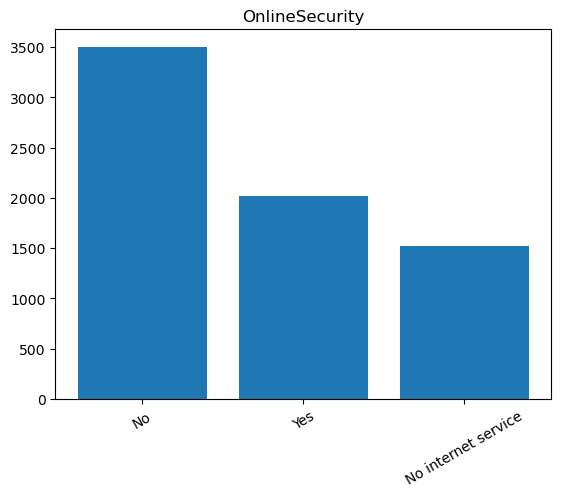

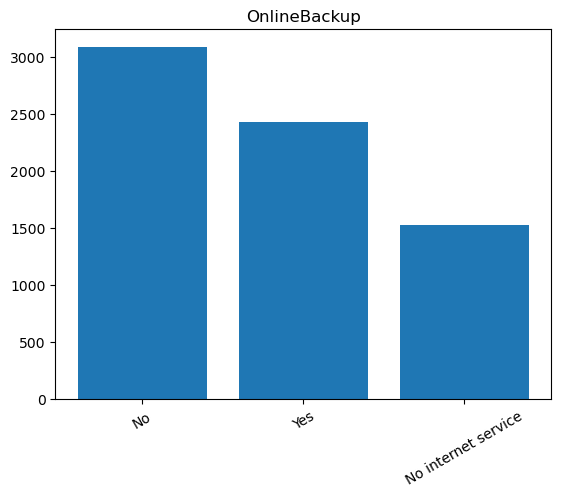

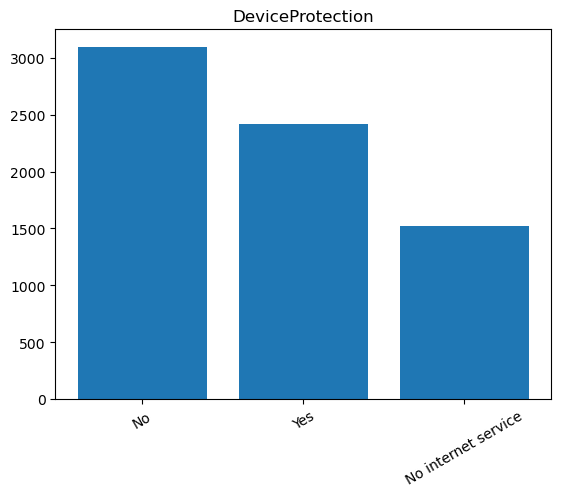

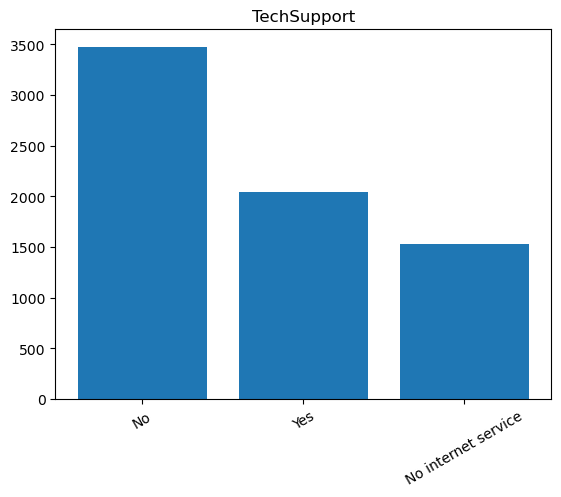

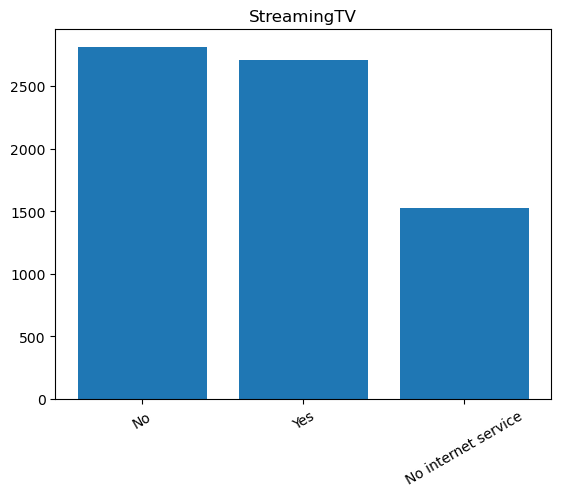

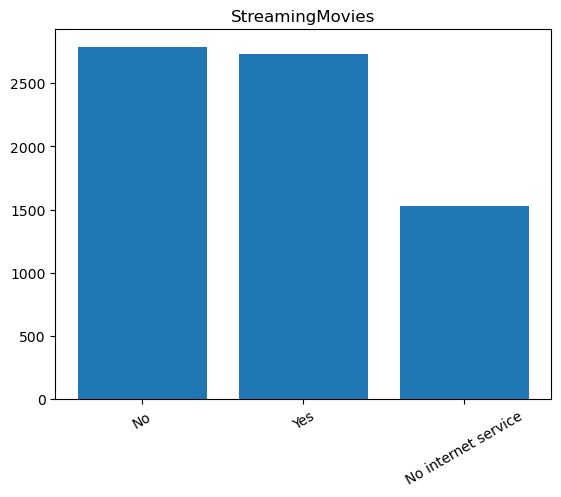

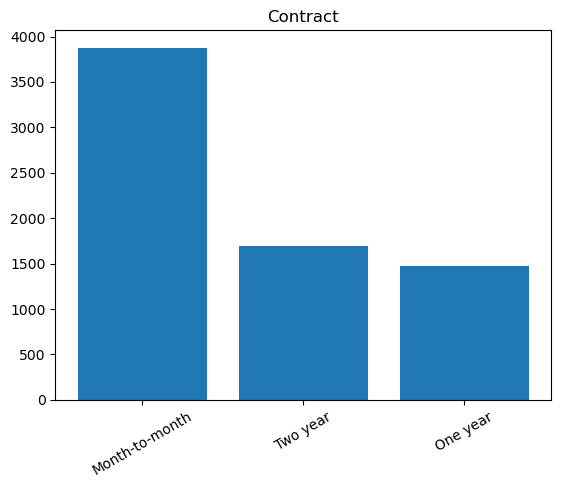

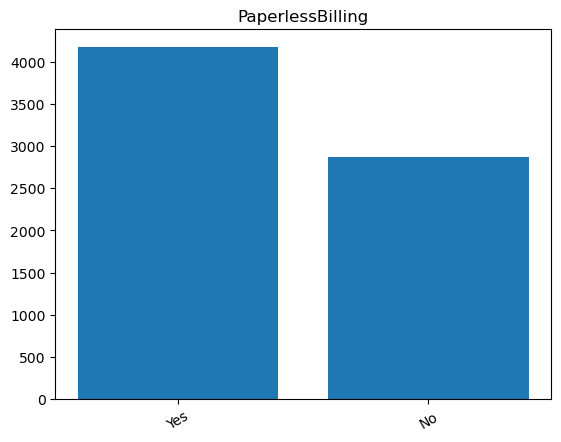

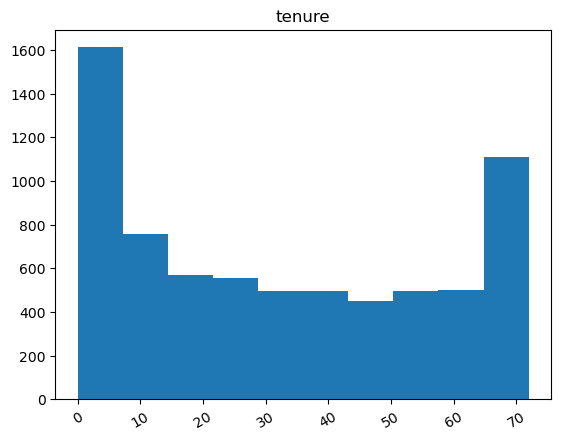

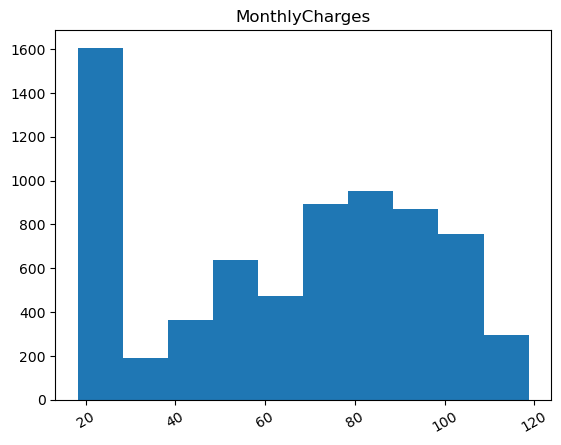

In [39]:
categorical_columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling']
num_columns=['tenure', 'MonthlyCharges']


for i in categorical_columns:
  plt.bar(df[i].value_counts().index, df[i].value_counts())
  plt.title(i)
  plt.xticks(rotation=30)
  plt.show()

for i in num_columns:
  plt.hist(df[i], 10)
  plt.title(i)
  plt.xticks(rotation=30)
  plt.show()

#'TotalCharges' couldn't be plotted because it contains null values.

In [5]:
#ٍEncoding

df['gender']=np.where(df['gender']=='Male',1,0)

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for i in yes_no_columns:
  df[i]=np.where(df[i]=='Yes',1,0)

one_hot_columns = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=one_hot_columns, drop_first=True)

df.dtypes


customerID                                object
gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
MultipleLines                              int64
OnlineSecurity                             int64
OnlineBackup                               int64
DeviceProtection                           int64
TechSupport                                int64
StreamingTV                                int64
StreamingMovies                            int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                              object
Churn                                      int64
InternetService_Fiber optic                 bool
InternetService_No                          bool
Contract_One year   

In [6]:
# Since the newly encoded columns are of boolean type, we convert them to integers.

df[df.select_dtypes(include='bool').columns] = df.select_dtypes(include='bool').astype(int)

# Additionally, we change the data type of 'TotalCharges' from object to numeric.
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')


In [7]:

#Outlier_Detection

def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df < lower_bound) | (df > upper_bound)]
    return outliers

candidate_cols = [col for col in df.columns if (df[col].nunique() > 2) and (df[col].dtype in ['float64', 'int64'])]


for i in candidate_cols:
    outliers = detect_outliers(df[i]).count()
    print(f"Outliers in column {i}: {outliers}")


Outliers in column tenure: 0
Outliers in column MonthlyCharges: 0
Outliers in column TotalCharges: 0


In [8]:
df.isnull().sum()


customerID                                0
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
InternetService_Fiber optic               0
InternetService_No                        0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (autom

In [ ]:
# Missing values in the 'Total_Charges' column were imputed using the median.

for i in ['TotalCharges']:
  df[i].fillna(value=df[i].median(), inplace=True)

In [10]:
#Here we normalize our data
columns_to_normalized = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i in columns_to_normalized:
    df[i]=(df[i] - df[i].min())/(df[i].max()-df[i].min())

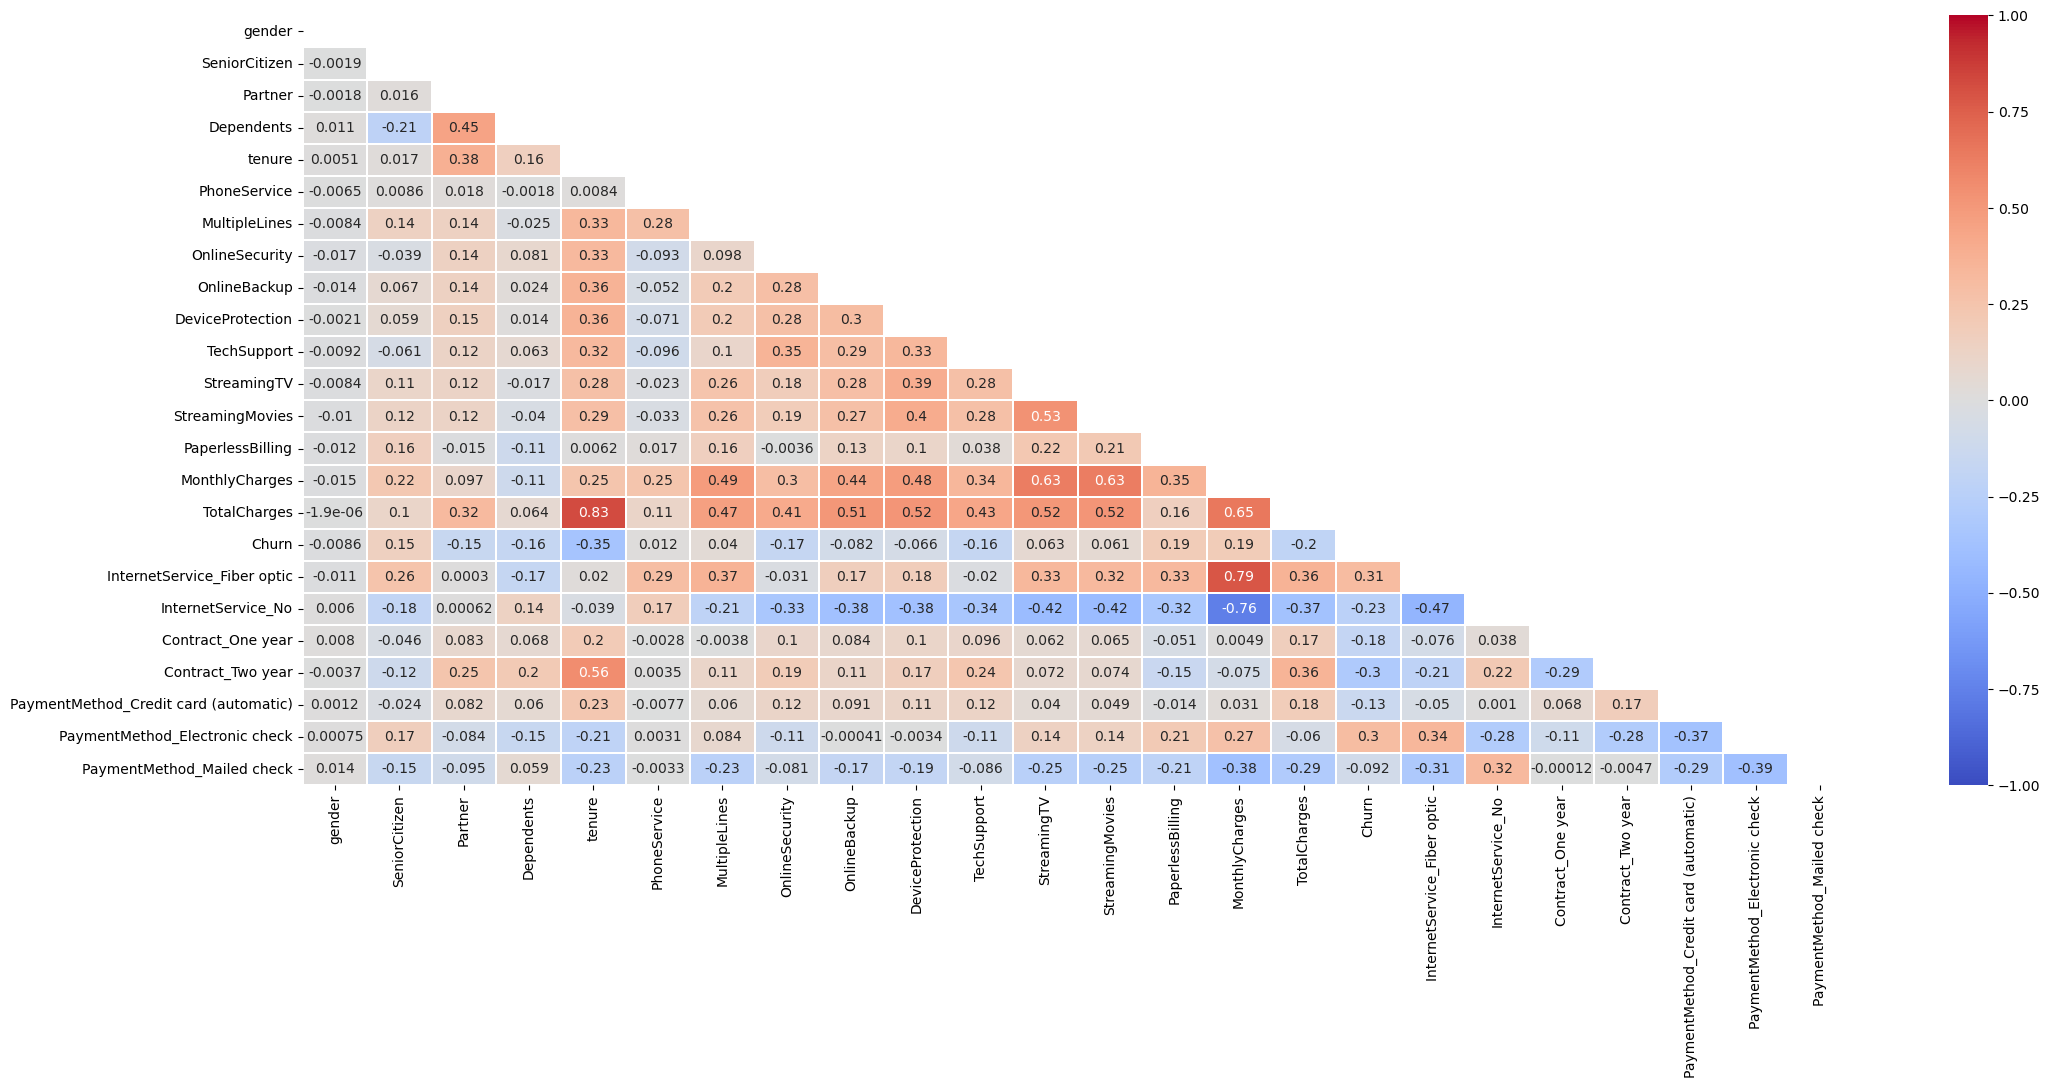

In [11]:
# We generate a correlation matrix to identify highly correlated features.
# Whenever the absolute correlation between two features is greater than 0.7, we eliminate the one that has a lower correlation with the target variable (Churn).

import seaborn as sns

plt.figure(figsize=(25, 10))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

In [12]:
#Based on the matrix above, we eliminate some variables

df.drop(columns=['TotalCharges', 'MonthlyCharges'], inplace=True)

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn', 'customerID'])
y=df['Churn']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=141)

y_train.value_counts()

Churn
0    4140
1    1494
Name: count, dtype: int64

#XGBOOST

In [ ]:

import optuna
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold



ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 2, 6),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1500),
        'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.5, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-1, 10.0, log=True),
        'eval_metric': 'logloss',
        'subsample': trial.suggest_float("subsample", 0.5, 1.0),
        'colsample_bytree': trial.suggest_float("colsample_bytree", 0.5, 1.0),
        'min_child_weight': trial.suggest_int("min_child_weight", 1, 10)


        }
    ratio = len(y_train[y_train==0]) / len(y_train[y_train==1])
    model = xgb.XGBClassifier(**param,  scale_pos_weight=ratio, random_state=141)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=141)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    return scores.mean()

study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler(seed=141))
study.optimize(objective, n_trials=200)  # تعداد دفعات تست


print("Best parameters:", study.best_params)

best_xgb = xgb.XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, y_train)

y_train_pred = best_xgb.predict_proba(X_train)[:,1]
y_xgb_hat_train = (y_train_pred > 0.4).astype(int)
y_val_pred = best_xgb.predict_proba(X_val)[:,1]
y_xgb_hat = (y_val_pred > 0.4).astype(int)


print("Report for train:\n",classification_report(y_train, y_xgb_hat_train))

print("Report for test:\n",classification_report(y_val, y_xgb_hat))

In [30]:
print("Best parameters:", study.best_params)

best_xgb = xgb.XGBClassifier(**study.best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb.fit(X_train, y_train)

y_train_pred = best_xgb.predict_proba(X_train)[:,1]
y_xgb_hat_train = (y_train_pred > 0.4).astype(int)
y_val_pred = best_xgb.predict_proba(X_val)[:,1]
y_xgb_hat = (y_val_pred > 0.4).astype(int)


print("Report for train:\n",classification_report(y_train, y_xgb_hat_train))

print("Report for test:\n",classification_report(y_val, y_xgb_hat))

Best parameters: {'max_depth': 6, 'n_estimators': 421, 'learning_rate': 0.01211974265121985, 'reg_lambda': 1.5551240859945077, 'subsample': 0.5728410623964225, 'colsample_bytree': 0.6404861555202498, 'min_child_weight': 2}


C:\ProgramData\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:04:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Report for train:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      4140
           1       0.66      0.69      0.68      1494

    accuracy                           0.82      5634
   macro avg       0.77      0.78      0.78      5634
weighted avg       0.83      0.82      0.83      5634

Report for test:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1034
           1       0.61      0.66      0.63       375

    accuracy                           0.80      1409
   macro avg       0.74      0.75      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold


def objective(trial):
    param = {
        "iterations": trial.suggest_int("iterations", 200, 1500),
        "depth": trial.suggest_int("depth", 3, 6),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 1, log=True),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5),
        "loss_function": "Logloss",
        "eval_metric": "Accuracy",
        "verbose": 0,
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "rsm": trial.suggest_float("rsm", 0.5, 1.0),
        "random_strength": trial.suggest_float("random_strength", 0, 10),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 7)
        }


    model = CatBoostClassifier(**param, early_stopping_rounds=150, random_state=141)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=141)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    return scores.mean()

study = optuna.create_study(direction="maximize",sampler=optuna.samplers.TPESampler(seed=141) )
study.optimize(objective, n_trials=200)

print("Best trial:")
print(study.best_trial.params)

# گرفتن بهترین پارامترها از Optuna
best_params = study.best_trial.params

# ساخت مدل CatBoost با بهترین پارامترها
final_cb = CatBoostClassifier(
    **best_params,
    verbose=0,

)

# آموزش مدل روی داده‌های Train
final_cb.fit(X_train, y_train)

# پیش‌بینی
y_train_pred = final_cb.predict_proba(X_train)[:,1]
y_train_tuned = (y_train_pred > 0.4).astype(int)
y_val_pred = final_cb.predict_proba(X_val)[:,1]
y_val_tuned = (y_val_pred > 0.4).astype(int)


print("Report for train:\n",classification_report(y_train, y_train_tuned))

print("Report for test:\n",classification_report(y_val, y_val_tuned))

In [36]:
cb_params={
    'iterations': 817,
 'depth': 3,
 'learning_rate': 0.014516416337392186,
 'l2_leaf_reg': 3.0546293536015803,
 'subsample': 0.6214449911360991,
 'rsm': 0.7477572752135527,
 'random_strength': 6.770123388430837,
 'bagging_temperature': 2.5042174959586596}

final_cb = CatBoostClassifier(
    **cb_params,
    verbose=0,

)

final_cb.fit(X_train, y_train)

y_train_pred = final_cb.predict_proba(X_train)[:,1]
y_train_tuned = (y_train_pred > 0.4).astype(int)
y_val_pred = final_cb.predict_proba(X_val)[:,1]
y_val_tuned = (y_val_pred > 0.4).astype(int)


print("Report for train:\n",classification_report(y_train, y_train_tuned))

print("Report for test:\n",classification_report(y_val, y_val_tuned))

Report for train:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      4140
           1       0.62      0.65      0.64      1494

    accuracy                           0.80      5634
   macro avg       0.75      0.76      0.75      5634
weighted avg       0.81      0.80      0.81      5634

Report for test:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      1034
           1       0.61      0.66      0.64       375

    accuracy                           0.80      1409
   macro avg       0.74      0.76      0.75      1409
weighted avg       0.80      0.80      0.80      1409



In [28]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': final_cb.feature_importances_
}).sort_values(by='Importance', ascending=False)
importances.head(10)

,Feature,Importance
17,Contract_Two year,27.940582
4,tenure,24.332971
14,InternetService_Fiber optic,10.264585
15,InternetService_No,9.372363
16,Contract_One year,5.034284
19,PaymentMethod_Electronic check,4.672102
20,PaymentMethod_Mailed check,2.124989
13,PaperlessBilling,1.953448
7,OnlineSecurity,1.879500
6,MultipleLines,1.784795


In [29]:
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
importances.head(20)

,Feature,Importance
17,Contract_Two year,0.300135
14,InternetService_Fiber optic,0.143196
16,Contract_One year,0.098625
15,InternetService_No,0.068974
4,tenure,0.052126
19,PaymentMethod_Electronic check,0.050682
7,OnlineSecurity,0.027053
5,PhoneService,0.025085
10,TechSupport,0.022646
1,SeniorCitizen,0.021586
